# Setup

Requires Python 3.10 and Poetry 1.6. Run setup commands to begin:
```
!poetry install
!poetry run jupyter lab
```

In [1]:
import os
import copy
import math
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

# Load data

In [2]:
def get_raw_data():
    return {
        "A": {
            "test_est": pd.read_parquet(os.path.join("data", "A", "X_test_estimated.parquet")),
            "train_est": pd.read_parquet(os.path.join("data", "A", "X_train_estimated.parquet")),
            "train_obs": pd.read_parquet(os.path.join("data", "A", "X_train_observed.parquet")),
            "train_tar": pd.read_parquet(os.path.join("data", "A", "train_targets.parquet")),
        },
        "B": {
            "test_est": pd.read_parquet(os.path.join("data", "B", "X_test_estimated.parquet")),
            "train_est": pd.read_parquet(os.path.join("data", "B", "X_train_estimated.parquet")),
            "train_obs": pd.read_parquet(os.path.join("data", "B", "X_train_observed.parquet")),
            "train_tar": pd.read_parquet(os.path.join("data", "B", "train_targets.parquet")),
        },
        "C": {
            "test_est": pd.read_parquet(os.path.join("data", "C", "X_test_estimated.parquet")),
            "train_est": pd.read_parquet(os.path.join("data", "C", "X_train_estimated.parquet")),
            "train_obs": pd.read_parquet(os.path.join("data", "C", "X_train_observed.parquet")),
            "train_tar": pd.read_parquet(os.path.join("data", "C", "train_targets.parquet")),
        },
    }
raw_data = get_raw_data()

In [3]:
for loc in ["A", "B", "C"]:
    display(loc, raw_data[loc]["test_est"])
    display(loc, raw_data[loc]["train_est"])
    display(loc, raw_data[loc]["train_obs"])
    display(loc, raw_data[loc]["train_tar"])

'A'

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2023-04-30 07:00:04,2023-05-01 00:00:00,4.4,1.286,912.700012,0.0,0.0,1041.199951,0.0,271.700012,0.0,0.0,0.0,0.0,80.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.0,0.0,1000.700012,1007.000000,0.0,0.0,80.300003,1013.299988,NaN,0.0,0.0,0.0,0.0,10.520000,-11.185,0.0,273.799988,80.699997,30210.699219,4.0,2.2,3.4,-0.0
1,2023-04-30 07:00:04,2023-05-01 00:15:00,4.3,1.287,912.700012,0.0,0.0,1054.800049,0.0,271.700012,0.0,0.0,0.0,0.0,77.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,1000.599976,1006.900024,0.0,0.0,80.300003,1013.200012,NaN,0.0,0.0,0.0,0.0,14.203000,-10.825,0.0,273.799988,77.000000,30003.599609,4.0,2.1,3.4,-0.0
2,2023-04-30 07:00:04,2023-05-01 00:30:00,4.3,1.287,912.700012,0.0,0.0,1068.300049,0.0,271.600006,0.0,0.0,0.0,0.0,73.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,1000.500000,1006.700012,0.0,0.0,80.300003,1013.000000,NaN,0.0,0.0,0.0,0.0,17.868999,-10.360,0.0,273.799988,73.099998,29797.099609,3.9,2.1,3.3,-0.0
3,2023-04-30 07:00:04,2023-05-01 00:45:00,4.3,1.287,912.700012,0.0,0.0,1081.900024,0.0,271.600006,0.0,0.0,0.0,0.0,69.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.500000,0.0,0.0,1000.400024,1006.599976,0.0,0.0,80.199997,1012.900024,NaN,0.0,0.0,0.0,0.0,21.514000,-9.794,0.0,273.799988,69.000000,29618.599609,3.9,2.0,3.3,-0.0
4,2023-04-30 07:00:04,2023-05-01 01:00:00,4.3,1.287,NaN,0.0,0.0,1095.400024,0.0,271.600006,0.0,0.0,0.0,0.0,64.500000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.299988,0.0,0.0,1000.200012,1006.500000,0.0,0.0,80.199997,1012.799988,NaN,0.0,0.0,0.0,0.0,25.135000,-9.128,0.0,273.799988,64.500000,29507.500000,3.9,2.0,3.3,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2023-07-02 07:00:31,2023-07-03 22:45:00,9.1,1.207,2090.600098,0.0,0.0,1629.400024,0.0,282.700012,0.0,0.0,0.0,0.0,99.300003,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.299988,0.0,0.0,980.799988,986.700012,0.0,0.0,82.199997,992.599976,NaN,0.0,0.0,-0.0,0.0,351.855988,-3.282,0.1,285.399994,99.400002,39931.601562,2.1,1.7,-1.3,0.0
2876,2023-07-02 07:00:31,2023-07-03 23:00:00,9.1,1.207,2015.800049,0.0,0.0,1537.300049,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,980.900024,986.799988,0.0,0.0,82.500000,992.700012,NaN,0.0,0.0,-0.0,0.0,355.317993,-3.469,0.1,285.299988,100.000000,39574.300781,2.0,1.6,-1.3,0.0
2877,2023-07-02 07:00:31,2023-07-03 23:15:00,9.1,1.208,2015.699951,0.0,0.0,1471.400024,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,981.000000,986.900024,0.0,0.0,82.800003,992.799988,NaN,0.0,0.0,-0.0,0.0,358.785004,-3.556,0.1,285.299988,100.000000,39627.199219,2.0,1.6,-1.2,0.0
2878,2023-07-02 07:00:31,2023-07-03 23:30:00,9.0,1.208,2015.599976,0.0,0.0,1405.500000,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.599976,0.0,0.0,981.000000,986.900024,0.0,0.0,83.199997,992.900024,NaN,0.0,0.0,-0.0,0.0,2.253000,-3.541,0.1,285.200012,100.000000,39691.800781,2.0,1.6,-1.1,0.0


'A'

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,988.500000,994.500000,0.0,0.0,92.699997,1000.599976,NaN,0.0,0.0,-0.0,0.4,340.799011,-38.466999,0.0,284.700012,100.000000,29429.699219,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.500000,1.0,281.299988,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.799988,0.0,0.0,988.200012,994.200012,0.0,0.1,92.699997,1000.299988,NaN,0.0,0.0,-0.0,0.4,345.451996,-38.955002,0.0,284.700012,100.000000,23604.099609,0.7,-0.4,0.7,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.233,2746.600098,0.0,0.0,1909.400024,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.400024,0.0,0.0,987.900024,993.900024,0.0,0.1,92.699997,1000.000000,NaN,0.0,0.0,-0.0,0.5,350.153015,-39.310001,0.0,284.700012,100.000000,17799.800781,0.7,-0.3,0.6,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.3,1.233,3407.399902,0.0,0.0,2258.199951,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.099976,0.0,0.0,987.599976,993.599976,0.0,0.1,92.599998,999.700012,NaN,0.0,0.0,-0.0,0.6,354.886993,-39.528999,0.0,284.600006,100.000000,12016.500000,0.6,-0.2,0.6,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.233,4068.199951,0.0,0.0,2607.000000,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.799988,0.0,0.0,987.299988,993.299988,0.0,0.1,92.599998,999.299988,NaN,0.0,0.0,-0.0,0.6,359.638000,-39.609001,0.0,284.600006,100.000000,6254.399902,0.6,-0.1,0.6,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17571,2023-04-29 07:00:05,2023-04-30 22:45:00,4.5,1.281,1173.900024,0.0,0.0,536.500000,0.0,272.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.0,0.0,1001.099976,1007.400024,0.0,0.0,79.599998,1013.700012,NaN,0.0,0.0,-0.0,0.1,352.920013,-11.731000,0.1,274.200012,99.900002,11629.299805,3.9,2.9,2.5,-0.0
17572,2023-04-29 07:00:05,2023-04-30 23:00:00,4.5,1.281,1054.199951,0.0,0.0,542.400024,0.0,272.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.0,0.0,1001.099976,1007.299988,0.0,0.0,80.000000,1013.599976,NaN,0.0,0.0,-0.0,0.1,356.634003,-11.884000,0.1,274.200012,100.000000,9923.200195,3.7,2.8,2.4,-0.0
17573,2023-04-29 07:00:05,2023-04-30 23:15:00,4.5,1.281,1435.800049,0.0,0.0,531.799988,0.0,272.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.099976,0.0,0.0,1000.900024,1007.200012,0.0,0.0,79.900002,1013.500000,NaN,0.0,0.0,-0.0,0.1,0.352000,-11.928000,0.1,274.200012,99.900002,11230.799805,3.7,2.7,2.5,-0.0
17574,2023-04-29 07:00:05,2023-04-30 23:30:00,4.5,1.281,1817.400024,0.0,0.0,521.200012,0.0,272.299988,0.0,0.0,0.0,0.0,98.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,1000.799988,1007.000000,0.0,0.0,79.800003,1013.299988,NaN,0.0,0.0,-0.0,0.0,4.070000,-11.864000,0.1,274.200012,99.599998,12526.099609,3.8,2.7,2.6,-0.0


'A'

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,0.0,0.0,0.0,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202000,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0
1,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,0.0,0.0,0.0,99.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.500000,0.0,0.0,993.900024,999.900024,0.0,0.0,72.199997,1006.000000,NaN,0.0,0.0,-0.0,0.2,346.294006,-3.650000,0.0,286.100006,100.0,40123.898438,3.6,-3.6,-0.6,-0.0
2,2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,0.0,0.0,0.0,99.199997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.099976,0.0,0.0,993.599976,999.599976,0.0,0.0,71.199997,1005.599976,NaN,0.0,0.0,-0.0,0.2,349.768005,-3.998000,0.0,286.299988,100.0,40628.300781,3.6,-3.6,-0.4,-0.0
3,2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.799988,0.0,0.0,993.299988,999.299988,0.0,0.0,70.199997,1005.299988,NaN,0.0,0.0,-0.0,0.2,353.251007,-4.247000,0.0,286.600006,100.0,41153.601562,3.5,-3.5,-0.2,-0.0
4,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393000,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118664,2022-10-21 00:00:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.800000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.400024,0.0,0.0,1005.500000,1011.799988,0.0,0.0,82.699997,1018.099976,NaN,0.0,0.0,-0.0,0.0,16.612000,-36.306000,0.0,276.899994,2.8,25791.000000,1.3,-0.4,1.2,-0.0
118665,2022-10-21 00:15:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.300000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.299988,0.0,0.0,1005.400024,1011.700012,0.0,0.0,83.099998,1018.000000,NaN,0.0,0.0,-0.0,0.0,21.132999,-35.762001,0.0,276.799988,2.3,28560.599609,1.4,-0.6,1.2,-0.0
118666,2022-10-21 00:30:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,1.700000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.200012,0.0,0.0,1005.299988,1011.599976,0.0,0.0,83.400002,1017.900024,NaN,0.0,0.0,-0.0,0.0,25.594000,-35.095001,0.0,276.600006,1.7,31317.800781,1.4,-0.8,1.2,-0.0
118667,2022-10-21 00:45:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.600006,0.0,0.0,0.0,0.0,1.100000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.000000,0.0,0.0,1005.099976,1011.400024,0.0,0.0,83.800003,1017.700012,NaN,0.0,0.0,-0.0,0.0,29.988001,-34.311001,0.0,276.500000,1.1,34062.601562,1.5,-1.0,1.1,-0.0


'A'

,time,pv_measurement
0,2019-06-02 22:00:00,0.00
1,2019-06-02 23:00:00,0.00
2,2019-06-03 00:00:00,0.00
3,2019-06-03 01:00:00,0.00
4,2019-06-03 02:00:00,19.36
...,...,...
34080,2023-04-30 19:00:00,9.02
34081,2023-04-30 20:00:00,0.00
34082,2023-04-30 21:00:00,0.00
34083,2023-04-30 22:00:00,0.00


'B'

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2023-04-30 07:00:04,2023-05-01 00:00:00,4.3,1.283,912.299988,0.0,0.0,1039.900024,0.0,271.700012,0.0,0.0,0.0,0.0,80.699997,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,1000.599976,1006.900024,0.0,0.0,80.300003,1013.200012,NaN,0.0,0.0,-0.0,0.0,10.521000,-11.184,0.0,273.799988,80.699997,31329.500000,4.0,2.2,3.4,-0.0
1,2023-04-30 07:00:04,2023-05-01 00:15:00,4.3,1.283,912.299988,0.0,0.0,1053.099976,0.0,271.700012,0.0,0.0,0.0,0.0,77.099998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.799988,0.0,0.0,1000.500000,1006.700012,0.0,0.0,80.300003,1013.000000,NaN,0.0,0.0,-0.0,0.0,14.204000,-10.824,0.0,273.799988,77.099998,31181.599609,4.0,2.1,3.4,-0.0
2,2023-04-30 07:00:04,2023-05-01 00:30:00,4.3,1.283,912.299988,0.0,0.0,1066.400024,0.0,271.600006,0.0,0.0,0.0,0.0,73.199997,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,1000.400024,1006.599976,0.0,0.0,80.199997,1012.900024,NaN,0.0,0.0,-0.0,0.0,17.870001,-10.360,0.0,273.799988,73.199997,31033.599609,3.9,2.1,3.4,-0.0
3,2023-04-30 07:00:04,2023-05-01 00:45:00,4.3,1.283,912.299988,0.0,0.0,1079.599976,0.0,271.600006,0.0,0.0,0.0,0.0,69.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,1000.200012,1006.500000,0.0,0.0,80.199997,1012.799988,NaN,0.0,0.0,-0.0,0.0,21.514000,-9.793,0.0,273.799988,69.000000,30885.699219,3.9,2.0,3.3,-0.0
4,2023-04-30 07:00:04,2023-05-01 01:00:00,4.3,1.283,NaN,0.0,0.0,1092.900024,0.0,271.600006,0.0,0.0,0.0,0.0,64.599998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.500000,0.0,0.0,1000.099976,1006.400024,0.0,0.0,80.199997,1012.700012,NaN,0.0,0.0,-0.0,0.0,25.135000,-9.127,0.0,273.799988,64.599998,30737.800781,3.9,2.0,3.3,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2023-07-02 07:00:31,2023-07-03 22:45:00,9.0,1.206,2091.000000,0.0,0.0,1630.500000,0.0,282.700012,0.0,0.0,0.0,0.0,99.300003,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,980.700012,986.599976,0.0,0.0,82.099998,992.500000,NaN,0.0,0.0,-0.0,0.0,351.856995,-3.281,0.1,285.399994,99.400002,40356.500000,2.1,1.7,-1.3,0.0
2876,2023-07-02 07:00:31,2023-07-03 23:00:00,9.1,1.207,2015.300049,0.0,0.0,1538.599976,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,980.799988,986.700012,0.0,0.0,82.400002,992.599976,NaN,0.0,0.0,-0.0,0.0,355.319000,-3.469,0.1,285.299988,100.000000,40004.199219,2.1,1.6,-1.3,0.0
2877,2023-07-02 07:00:31,2023-07-03 23:15:00,9.0,1.207,2015.199951,0.0,0.0,1473.599976,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,980.799988,986.700012,0.0,0.0,82.800003,992.700012,NaN,0.0,0.0,-0.0,0.0,358.786011,-3.556,0.1,285.299988,100.000000,40071.398438,2.0,1.6,-1.2,0.0
2878,2023-07-02 07:00:31,2023-07-03 23:30:00,9.0,1.207,2015.000000,0.0,0.0,1408.599976,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.599976,0.0,0.0,980.900024,986.799988,0.0,0.0,83.099998,992.700012,NaN,0.0,0.0,-0.0,0.0,2.253000,-3.540,0.1,285.200012,100.000000,40138.101562,2.0,1.6,-1.1,0.0


'B'

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.900024,1.0,281.399994,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,988.400024,994.400024,0.0,0.0,92.699997,1000.500000,NaN,0.0,0.0,-0.0,0.4,340.799988,-38.466000,0.0,284.700012,100.000000,29393.500000,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2086.000000,0.0,0.0,1562.500000,1.0,281.399994,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.799988,0.0,0.0,988.099976,994.099976,0.0,0.1,92.699997,1000.099976,NaN,0.0,0.0,-0.0,0.4,345.453003,-38.955002,0.0,284.700012,100.000000,23576.500000,0.7,-0.4,0.6,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.4,1.232,2746.899902,0.0,0.0,1913.099976,1.0,281.500000,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.500000,0.0,0.0,987.799988,993.799988,0.0,0.1,92.599998,999.799988,NaN,0.0,0.0,-0.0,0.5,350.153992,-39.310001,0.0,284.700012,100.000000,17780.300781,0.7,-0.3,0.6,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.4,1.232,3407.800049,0.0,0.0,2263.699951,1.0,281.500000,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.200012,0.0,0.0,987.500000,993.500000,0.0,0.1,92.599998,999.500000,NaN,0.0,0.0,-0.0,0.6,354.888000,-39.528999,0.0,284.600006,100.000000,12005.099609,0.6,-0.2,0.6,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.5,1.231,4068.699951,0.0,0.0,2614.300049,1.0,281.500000,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.900024,0.0,0.0,987.200012,993.200012,0.0,0.1,92.599998,999.200012,NaN,0.0,0.0,-0.0,0.6,359.639008,-39.609001,0.0,284.600006,100.000000,6250.600098,0.6,-0.1,0.6,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17571,2023-04-29 07:00:05,2023-04-30 22:45:00,4.5,1.280,1175.400024,0.0,0.0,536.299988,0.0,272.200012,0.0,0.0,0.0,0.0,99.599998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.400024,0.0,0.0,1001.000000,1007.299988,0.0,0.0,79.599998,1013.599976,NaN,0.0,0.0,-0.0,0.1,352.920990,-11.731000,0.1,274.200012,99.900002,11721.799805,3.9,3.0,2.5,-0.0
17572,2023-04-29 07:00:05,2023-04-30 23:00:00,4.5,1.281,1055.800049,0.0,0.0,542.099976,0.0,272.200012,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.0,0.0,1001.000000,1007.200012,0.0,0.0,80.000000,1013.500000,NaN,0.0,0.0,-0.0,0.1,356.635010,-11.884000,0.1,274.200012,100.000000,9955.500000,3.7,2.8,2.5,-0.0
17573,2023-04-29 07:00:05,2023-04-30 23:15:00,4.5,1.280,1437.300049,0.0,0.0,531.500000,0.0,272.200012,0.0,0.0,0.0,0.0,99.400002,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.200012,0.0,0.0,1000.799988,1007.099976,0.0,0.0,79.900002,1013.299988,NaN,0.0,0.0,-0.0,0.1,0.353000,-11.928000,0.1,274.200012,99.900002,11324.400391,3.7,2.8,2.5,-0.0
17574,2023-04-29 07:00:05,2023-04-30 23:30:00,4.5,1.280,1818.699951,0.0,0.0,520.900024,0.0,272.299988,0.0,0.0,0.0,0.0,98.099998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,1000.700012,1006.900024,0.0,0.0,79.800003,1013.200012,NaN,0.0,0.0,-0.0,0.0,4.070000,-11.863000,0.1,274.299988,99.599998,12693.599609,3.8,2.7,2.6,-0.0


'B'

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-01-01 00:00:00,5.6,1.239,1226.400024,0.0,0.0,1226.400024,0.0,275.399994,0.0,0.0,0.0,0.0,69.599998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.400024,0.00,0.0,974.500000,980.599976,0.0,0.0,89.199997,986.599976,NaN,0.0,0.0,-0.0,0.0,12.985000,-49.139999,0.0,278.399994,73.900002,19275.900391,2.5,1.1,2.2,-0.0
1,2019-01-01 00:15:00,5.6,1.239,1209.300049,0.0,0.0,1209.300049,0.0,275.200012,0.0,0.0,0.0,0.0,78.599998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.099976,0.05,1.0,974.200012,980.299988,0.0,0.0,89.099998,986.400024,NaN,0.0,0.0,-0.0,0.0,18.205999,-48.688000,0.0,278.299988,83.800003,17638.000000,2.7,1.2,2.4,-0.0
2,2019-01-01 00:30:00,5.5,1.240,1192.099976,0.0,0.0,1192.099976,0.0,275.100006,0.0,0.0,0.0,0.0,86.300003,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.900024,0.05,1.0,974.000000,980.000000,0.0,0.0,89.099998,986.099976,NaN,0.0,0.0,-0.0,0.1,23.339001,-48.091000,0.0,278.200012,91.199997,16008.799805,2.9,1.2,2.7,-0.0
3,2019-01-01 00:45:00,5.4,1.241,1174.900024,0.0,0.0,1174.900024,0.0,274.899994,0.0,0.0,0.0,0.0,92.800003,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.599976,0.05,1.0,973.700012,979.799988,0.0,0.0,89.000000,985.799988,NaN,0.0,0.0,-0.0,0.1,28.367001,-47.358002,0.0,278.100006,96.400002,14388.500000,3.1,1.2,2.9,-0.0
4,2019-01-01 01:00:00,5.4,1.241,1157.599976,0.0,0.0,1157.599976,0.0,274.700012,0.0,0.0,0.0,0.0,98.099998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.299988,0.05,1.0,973.400024,979.500000,0.0,0.0,88.900002,985.599976,NaN,0.0,0.0,-0.0,0.1,33.275002,-46.497002,0.0,278.000000,99.400002,12777.299805,3.4,1.3,3.1,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116924,2022-05-02 23:00:00,4.3,1.282,NaN,0.0,0.0,691.599976,0.0,271.500000,0.0,0.0,0.0,0.0,46.900002,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1016.599976,0.04,2.0,1003.299988,1009.500000,0.0,0.0,74.199997,1015.799988,NaN,0.0,0.0,-0.0,0.0,356.487000,-11.198000,0.0,274.399994,46.900002,20778.300781,4.4,3.9,-2.0,0.0
116925,2022-05-02 23:15:00,4.3,1.282,NaN,0.0,0.0,689.000000,0.0,271.500000,0.0,0.0,0.0,0.0,48.200001,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1016.700012,0.00,0.0,1003.400024,1009.599976,0.0,0.0,74.199997,1015.900024,NaN,0.0,0.0,-0.0,0.0,0.184000,-11.247000,0.0,274.399994,48.200001,20153.599609,4.5,4.0,-2.0,0.0
116926,2022-05-02 23:30:00,4.3,1.282,NaN,0.0,0.0,686.400024,0.0,271.500000,0.0,0.0,0.0,0.0,49.599998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1016.799988,0.00,0.0,1003.500000,1009.700012,0.0,0.0,74.099998,1016.000000,NaN,0.0,0.0,-0.0,0.0,3.881000,-11.187000,0.0,274.299988,49.599998,19528.699219,4.5,4.1,-2.0,0.0
116927,2022-05-02 23:45:00,4.2,1.283,NaN,0.0,0.0,683.799988,0.0,271.399994,0.0,0.0,0.0,0.0,51.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1016.900024,0.00,0.0,1003.599976,1009.799988,0.0,0.0,74.099998,1016.099976,NaN,0.0,0.0,-0.0,0.0,7.573000,-11.019000,0.0,274.200012,51.000000,18903.699219,4.6,4.1,-2.0,0.0


'B'

,time,pv_measurement
0,2018-12-31 23:00:00,0.000000
1,2019-01-01 00:00:00,0.000000
2,2019-01-01 01:00:00,0.000000
3,2019-01-01 02:00:00,0.000000
4,2019-01-01 03:00:00,0.000000
...,...,...
32843,2023-04-30 19:00:00,0.828587
32844,2023-04-30 20:00:00,-0.000000
32845,2023-04-30 21:00:00,-0.000000
32846,2023-04-30 22:00:00,-0.000000


'C'

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2023-04-30 07:00:04,2023-05-01 00:00:00,4.2,1.286,NaN,0.0,0.0,1178.000000,0.0,271.100006,0.0,0.0,0.0,0.0,73.699997,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,998.200012,1004.500000,0.0,0.0,81.099998,1010.799988,NaN,0.0,0.0,0.0,0.0,10.519000,-11.223,0.0,273.700012,73.699997,31411.000000,3.5,1.5,3.1,-0.0
1,2023-04-30 07:00:04,2023-05-01 00:15:00,4.2,1.286,NaN,0.0,0.0,1217.000000,0.0,271.100006,0.0,0.0,0.0,0.0,70.800003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.799988,0.0,0.0,998.099976,1004.299988,0.0,0.0,81.000000,1010.599976,NaN,0.0,0.0,0.0,0.0,14.202000,-10.862,0.0,273.700012,70.800003,31295.800781,3.4,1.5,3.1,-0.0
2,2023-04-30 07:00:04,2023-05-01 00:30:00,4.1,1.286,NaN,0.0,0.0,1256.000000,0.0,271.000000,0.0,0.0,0.0,0.0,67.900002,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,998.000000,1004.200012,0.0,0.0,80.900002,1010.500000,NaN,0.0,0.0,0.0,0.0,17.868000,-10.397,0.0,273.700012,67.900002,31178.599609,3.4,1.4,3.1,-0.0
3,2023-04-30 07:00:04,2023-05-01 00:45:00,4.1,1.286,NaN,0.0,0.0,1295.000000,0.0,270.899994,0.0,0.0,0.0,0.0,64.800003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,997.799988,1004.099976,0.0,0.0,80.800003,1010.400024,NaN,0.0,0.0,0.0,0.0,21.513000,-9.830,0.0,273.700012,64.800003,31082.500000,3.4,1.4,3.1,-0.0
4,2023-04-30 07:00:04,2023-05-01 01:00:00,4.1,1.286,NaN,0.0,0.0,1334.099976,0.0,270.899994,0.0,0.0,0.0,0.0,61.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.400024,0.0,0.0,997.700012,1004.000000,0.0,0.0,80.599998,1010.299988,NaN,0.0,0.0,0.0,0.0,25.134001,-9.163,0.0,273.700012,61.599998,31051.400391,3.4,1.4,3.1,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2023-07-02 07:00:31,2023-07-03 22:45:00,9.0,1.207,2003.500000,0.0,0.0,1573.000000,0.0,282.600006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,978.799988,984.700012,0.0,0.0,84.000000,990.599976,NaN,0.0,0.0,-0.0,0.0,351.852997,-3.320,0.1,285.299988,100.000000,39008.300781,1.8,1.6,-0.7,0.0
2876,2023-07-02 07:00:31,2023-07-03 23:00:00,9.0,1.207,2005.599976,0.0,0.0,1471.000000,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.799988,984.700012,0.0,0.0,84.099998,990.700012,NaN,0.0,0.0,-0.0,0.0,355.315002,-3.508,0.1,285.200012,100.000000,39026.000000,1.7,1.6,-0.7,0.0
2877,2023-07-02 07:00:31,2023-07-03 23:15:00,9.0,1.207,2005.500000,0.0,0.0,1346.900024,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.900024,984.799988,0.0,0.0,84.400002,990.700012,NaN,0.0,0.0,-0.0,0.0,358.782013,-3.594,0.1,285.100006,100.000000,39081.300781,1.7,1.6,-0.6,0.0
2878,2023-07-02 07:00:31,2023-07-03 23:30:00,8.9,1.207,2005.500000,0.0,0.0,1222.800049,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.599976,0.0,0.0,979.000000,984.900024,0.0,0.0,84.800003,990.799988,NaN,0.0,0.0,-0.0,0.0,2.250000,-3.579,0.2,285.100006,100.000000,39145.101562,1.7,1.6,-0.6,0.0


'C'

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.3,1.231,1427.400024,0.0,0.0,1215.800049,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,986.000000,992.000000,0.0,0.0,93.900002,998.099976,NaN,0.0,0.0,-0.0,0.4,340.785004,-38.502998,0.0,285.200012,100.000000,34387.398438,1.2,-0.3,1.1,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.3,1.231,2089.000000,0.0,0.0,1425.900024,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.700012,0.0,0.0,985.700012,991.700012,0.0,0.0,93.599998,997.700012,NaN,0.0,0.0,-0.0,0.5,345.440002,-38.992001,0.0,285.100006,100.000000,27418.500000,1.2,-0.2,1.2,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.231,2750.500000,0.0,0.0,1636.099976,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.400024,0.0,0.0,985.400024,991.400024,0.0,0.1,93.300003,997.400024,NaN,0.0,0.0,-0.0,0.5,350.144012,-39.348000,0.0,285.100006,100.000000,20508.800781,1.2,-0.1,1.2,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.2,1.230,3412.100098,0.0,0.0,1846.199951,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.099976,0.0,0.0,985.099976,991.099976,0.0,0.1,93.000000,997.099976,NaN,0.0,0.0,-0.0,0.5,354.880005,-39.567001,0.0,285.000000,100.000000,13657.799805,1.2,-0.0,1.2,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.230,4073.699951,0.0,0.0,2056.399902,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.700012,0.0,0.0,984.700012,990.700012,0.0,0.1,92.699997,996.799988,NaN,0.0,0.0,-0.0,0.6,359.634003,-39.647999,0.0,285.000000,100.000000,6865.000000,1.2,0.1,1.2,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17571,2023-04-29 07:00:05,2023-04-30 22:45:00,4.4,1.280,1034.599976,0.0,0.0,562.299988,0.0,272.000000,0.0,0.0,0.0,0.0,99.800003,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.400024,0.0,0.0,998.599976,1004.900024,0.0,0.0,80.000000,1011.099976,NaN,0.0,0.0,-0.0,0.1,352.915985,-11.769000,0.2,274.200012,99.900002,10681.200195,3.0,2.1,2.2,-0.0
17572,2023-04-29 07:00:05,2023-04-30 23:00:00,4.4,1.280,897.200012,0.0,0.0,569.500000,0.0,272.000000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.400024,0.0,0.0,998.500000,1004.799988,0.0,0.0,80.400002,1011.099976,NaN,0.0,0.0,-0.0,0.1,356.630005,-11.923000,0.2,274.100006,100.000000,9890.900391,2.8,1.9,2.1,-0.0
17573,2023-04-29 07:00:05,2023-04-30 23:15:00,4.4,1.280,1288.699951,0.0,0.0,562.299988,0.0,272.000000,0.0,0.0,0.0,0.0,99.699997,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.200012,0.0,0.0,998.400024,1004.700012,0.0,0.0,80.099998,1010.900024,NaN,0.0,0.0,-0.0,0.1,0.349000,-11.967000,0.1,274.200012,100.000000,10716.799805,2.9,1.9,2.2,-0.0
17574,2023-04-29 07:00:05,2023-04-30 23:30:00,4.4,1.280,1680.300049,0.0,0.0,555.099976,0.0,271.899994,0.0,0.0,0.0,0.0,99.000000,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.099976,0.0,0.0,998.299988,1004.500000,0.0,0.0,79.800003,1010.799988,NaN,0.0,0.0,-0.0,0.1,4.067000,-11.902000,0.1,274.200012,99.800003,11538.799805,3.0,1.9,2.3,-0.0


'C'

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-01-01 00:00:00,5.6,1.240,1153.599976,0.0,0.0,1153.599976,1.0,275.200012,0.0,0.0,0.0,0.0,63.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.299988,0.00,0.0,972.599976,978.599976,0.0,0.0,90.199997,984.700012,NaN,0.0,0.0,-0.0,0.0,12.989000,-49.178001,0.0,278.500000,68.500000,18220.400391,2.5,1.1,2.2,-0.0
1,2019-01-01 00:15:00,5.5,1.241,1137.900024,0.0,0.0,1137.900024,1.0,275.100006,0.0,0.0,0.0,0.0,74.900002,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.099976,0.06,1.0,972.299988,978.299988,0.2,0.0,90.000000,984.400024,NaN,0.0,0.0,-0.0,0.0,18.214001,-48.724998,0.0,278.399994,80.800003,17083.699219,2.8,1.1,2.5,-0.0
2,2019-01-01 00:30:00,5.4,1.241,1122.199951,0.0,0.0,1122.199951,1.0,274.899994,0.0,0.0,0.0,0.0,84.300003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.799988,0.06,1.0,972.000000,978.000000,0.3,0.0,89.900002,984.099976,NaN,0.0,0.0,-0.0,0.1,23.351000,-48.127998,0.0,278.299988,89.900002,15940.900391,3.0,1.1,2.8,-0.0
3,2019-01-01 00:45:00,5.4,1.241,1106.400024,0.0,0.0,1106.400024,1.0,274.700012,0.0,0.0,0.0,0.0,92.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.599976,0.06,1.0,971.700012,977.799988,0.3,0.0,89.699997,983.799988,NaN,0.0,0.0,-0.0,0.1,28.382000,-47.393002,0.0,278.200012,96.099998,14792.000000,3.3,1.2,3.0,-0.0
4,2019-01-01 01:00:00,5.3,1.241,1090.599976,0.0,0.0,1090.599976,1.0,274.500000,0.0,0.0,0.0,0.0,98.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.400024,0.06,1.0,971.400024,977.500000,0.4,0.0,89.599998,983.599976,NaN,0.0,0.0,-0.0,0.1,33.292999,-46.529999,0.0,278.100006,99.400002,13637.299805,3.5,1.2,3.3,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116820,2022-05-01 21:00:00,4.9,1.257,2652.000000,0.0,0.0,1536.500000,0.0,273.600006,0.0,0.0,0.0,0.0,95.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.799988,0.00,0.0,999.299988,1005.400024,0.0,0.0,62.599998,1011.599976,NaN,0.0,0.0,-0.0,0.0,327.303009,-7.367000,0.0,279.299988,100.000000,38312.000000,4.7,3.0,3.6,-0.0
116821,2022-05-01 21:15:00,4.9,1.256,2375.300049,0.0,0.0,1484.500000,0.0,273.600006,0.0,0.0,0.0,0.0,97.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.500000,0.00,0.0,999.000000,1005.099976,0.0,0.0,62.799999,1011.299988,NaN,0.0,0.0,-0.0,0.0,330.863007,-8.232000,0.1,279.299988,100.000000,38344.199219,4.8,3.2,3.6,-0.0
116822,2022-05-01 21:30:00,4.9,1.256,2098.699951,0.0,0.0,1432.500000,0.0,273.500000,0.0,0.0,0.0,0.0,98.500000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.200012,0.00,0.0,998.599976,1004.799988,0.0,0.0,63.000000,1010.900024,NaN,0.0,0.0,-0.0,0.0,334.451996,-9.006000,0.1,279.200012,100.000000,38402.601562,4.9,3.3,3.6,-0.0
116823,2022-05-01 21:45:00,4.8,1.255,1822.000000,0.0,0.0,1380.400024,0.0,273.399994,0.0,0.0,0.0,0.0,99.500000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.00,0.0,998.299988,1004.400024,0.0,0.0,63.200001,1010.599976,NaN,0.0,0.0,-0.0,0.0,338.067993,-9.683000,0.1,279.200012,100.000000,38478.800781,5.0,3.5,3.6,-0.0


'C'

,time,pv_measurement
0,2018-12-31 23:00:00,NaN
1,2019-01-01 00:00:00,NaN
2,2019-01-01 01:00:00,NaN
3,2019-01-01 02:00:00,NaN
4,2019-01-01 03:00:00,NaN
...,...,...
32150,2023-04-30 19:00:00,50.96
32151,2023-04-30 20:00:00,2.94
32152,2023-04-30 21:00:00,0.00
32153,2023-04-30 22:00:00,-0.00


In [4]:
for loc in ["A", "B", "C"]:
    nans = raw_data[loc]["test_est"].set_index("date_forecast").isna()
    display(loc, "test_est", nans.sum()[nans.sum() != 0])
    #nans.sum(axis=1).plot(lw=0.5)
    #plt.show()

    nans = raw_data[loc]["train_est"].set_index("date_forecast").isna()
    display(loc, "train_est", nans.sum()[nans.sum() != 0])
    #nans.sum(axis=1).plot(lw=0.3)
    #plt.show()

    nans = raw_data[loc]["train_obs"].set_index("date_forecast").isna()
    display(loc, "train_obs", nans.sum()[nans.sum() != 0])
    #nans.sum(axis=1).plot(lw=0.1)
    #plt.show()

'A'

'test_est'

ceiling_height_agl:m     793
cloud_base_agl:m         298
snow_density:kgm3       2880
dtype: int64

'A'

'train_est'

ceiling_height_agl:m     3919
cloud_base_agl:m         2094
snow_density:kgm3       15769
dtype: int64

'A'

'train_obs'

ceiling_height_agl:m     22247
cloud_base_agl:m          8066
snow_density:kgm3       115945
dtype: int64

'B'

'test_est'

ceiling_height_agl:m     755
cloud_base_agl:m         277
snow_density:kgm3       2880
dtype: int64

'B'

'train_est'

ceiling_height_agl:m     3689
cloud_base_agl:m         1963
snow_density:kgm3       15713
dtype: int64

'B'

'train_obs'

ceiling_height_agl:m     18772
cloud_base_agl:m          7473
snow_density:kgm3       111201
dtype: int64

'C'

'test_est'

ceiling_height_agl:m     849
cloud_base_agl:m         375
snow_density:kgm3       2880
dtype: int64

'C'

'train_est'

ceiling_height_agl:m     4596
cloud_base_agl:m         2804
snow_density:kgm3       13898
dtype: int64

'C'

'train_obs'

ceiling_height_agl:m     19923
cloud_base_agl:m          8512
snow_density:kgm3       107593
dtype: int64

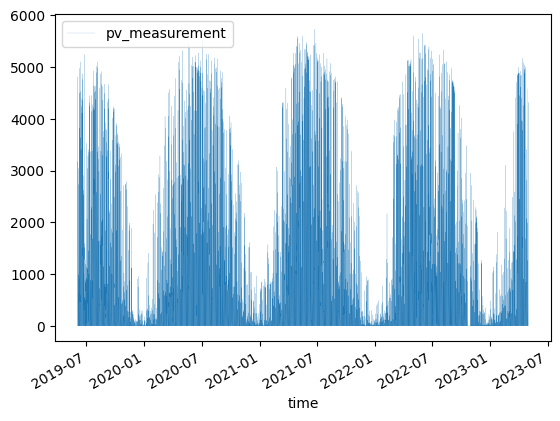

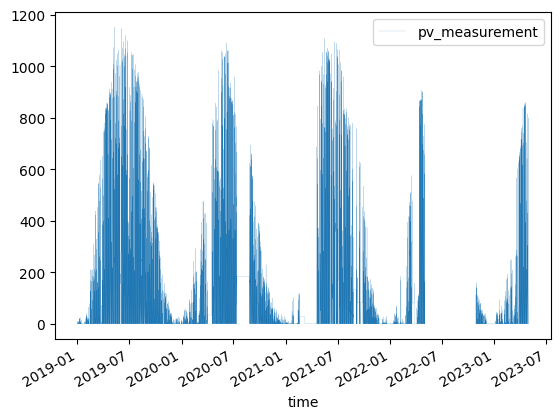

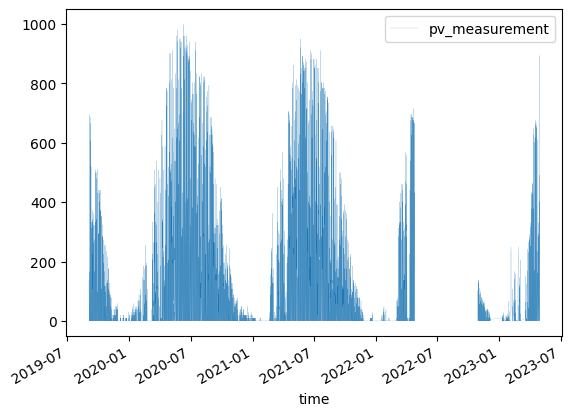

In [5]:
for loc in ["A", "B", "C"]:
    raw_data[loc]["train_tar"].set_index("time").plot(lw=0.1)
    plt.show()

# Data preprocessing

Basic data preprocessing of raw data

In [6]:
def preprocess_raw_data(raw_data):
    # Create empty list of location train data and location test data
    train_data = {}
    test_data = {}
    
    # Copy raw data dictonary and loop through it
    raw_data_copy = copy.deepcopy(raw_data)
    for k in raw_data_copy:
        # Add a column with the difference between date_forecast and date_calc in seconds and 
        raw_data_copy[k]["train_obs"]["forecast_seconds"] = 0
        raw_data_copy[k]["train_est"]["forecast_seconds"] = (raw_data_copy[k]["train_est"]["date_forecast"] - raw_data_copy[k]["train_est"]["date_calc"]).apply(lambda x: x.total_seconds())
        raw_data_copy[k]["test_est"]["forecast_seconds"] = (raw_data_copy[k]["test_est"]["date_forecast"] - raw_data_copy[k]["test_est"]["date_calc"]).apply(lambda x: x.total_seconds())
    
        # Remove date_calc
        del raw_data_copy[k]["train_est"]["date_calc"]
        del raw_data_copy[k]["test_est"]["date_calc"]
    
        # Concat and merge train observed, train estimated and train target to one dataframe
        location_train_data = pd.merge(
            raw_data_copy[k]["train_tar"],
            pd.concat([raw_data_copy[k]["train_obs"], raw_data_copy[k]["train_est"]]).rename(columns={"date_forecast": "time"}),
            on="time",
            how="outer"
        ).set_index("time").sort_index()
        location_test_data = raw_data_copy[k]["test_est"].rename(columns={"date_forecast": "time"}).set_index("time").sort_index()
    
        # Replace all ':' with '_'
        location_train_data.columns = [col_name.replace(":", "_") for col_name in location_train_data.columns]
        location_test_data.columns = [col_name.replace(":", "_") for col_name in location_test_data.columns]
    
        # Remove columns only containing a single or non values
        del location_train_data['snow_density_kgm3']
        del location_test_data['snow_density_kgm3']
        
        # Add to dictonary
        train_data[k] = location_train_data
        test_data[k] = location_test_data

    return train_data, test_data

train_data, test_data = preprocess_raw_data(raw_data)

Gap detection

In [7]:
def detect_timeseries_gaps(data, target, min_gap_interval):
    gaps_date = []
    
    start_date = data.index[0]
    start_val = data[target].iloc[0]
    
    for date in data.index:
        val = data[target][date]
        
        if(val != start_val and not math.isnan(val)):
            if(date - start_date > min_gap_interval):
                gaps_date.append((start_date, date))
    
            start_date = date
            start_val = val

    return gaps_date
    
gaps = {}
for loc in ["A", "B", "C"]:
    gaps[loc] = detect_timeseries_gaps(
        data = train_data[loc], 
        target = "pv_measurement",
        min_gap_interval = pd.Timedelta(days=10)
    )

    display(loc, gaps[loc])

'A'

[]

'B'

[(Timestamp('2020-04-02 01:00:00'), Timestamp('2020-04-16 07:00:00')),
 (Timestamp('2020-07-12 20:00:00'), Timestamp('2020-08-25 22:00:00')),
 (Timestamp('2021-02-17 23:00:00'), Timestamp('2021-03-08 15:00:00')),
 (Timestamp('2021-03-08 15:00:00'), Timestamp('2021-04-19 12:00:00')),
 (Timestamp('2022-05-02 16:00:00'), Timestamp('2022-10-29 07:00:00')),
 (Timestamp('2022-12-06 12:00:00'), Timestamp('2022-12-27 10:00:00'))]

'C'

[(Timestamp('2018-12-31 23:00:00'), Timestamp('2019-09-04 08:00:00')),
 (Timestamp('2020-02-23 16:00:00'), Timestamp('2020-03-08 09:00:00')),
 (Timestamp('2021-01-09 13:00:00'), Timestamp('2021-01-22 11:00:00')),
 (Timestamp('2021-01-24 12:00:00'), Timestamp('2021-02-19 11:00:00')),
 (Timestamp('2021-11-24 13:00:00'), Timestamp('2021-12-14 10:00:00')),
 (Timestamp('2021-12-21 13:00:00'), Timestamp('2022-01-16 11:00:00')),
 (Timestamp('2022-02-08 13:00:00'), Timestamp('2022-03-02 10:00:00')),
 (Timestamp('2022-04-25 19:00:00'), Timestamp('2022-10-29 08:00:00')),
 (Timestamp('2022-12-05 13:00:00'), Timestamp('2023-01-08 12:00:00')),
 (Timestamp('2023-03-05 11:00:00'), Timestamp('2023-03-18 08:00:00'))]

# Visualize data

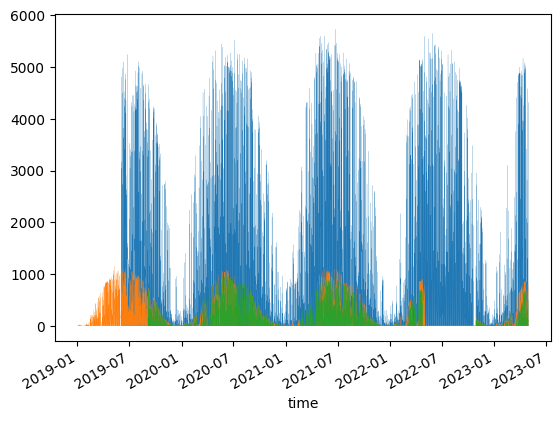

In [8]:
for loc in ["A", "B", "C"]:
    train_data[loc]["pv_measurement"].dropna().plot(lw=0.1)
plt.show()

TypeError: list indices must be integers or slices, not str

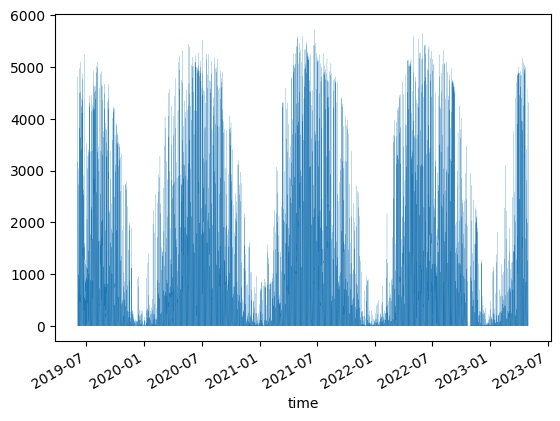

In [9]:
for loc in ["A", "B", "C"]:
    ax = train_data[loc]["pv_measurement"].dropna().plot(lw=0.1)
    
    for start_date, end_date in gaps[loc]:
        plt.axvline(start_date, linestyle='--', color="green")
        plt.axvline(end_date, linestyle='--', color="red")

    plt.show()

In [ ]:
pd.concat(train_data).hist(figsize=(20,20))
plt.show()

In [ ]:
cols = train_data["A"].select_dtypes(include=['number']).columns
display(list(zip(range(len(cols)), cols)))

plt.matshow(pd.concat(train_data).corr(numeric_only=True), cmap="PRGn", interpolation="none", vmin=-1, vmax=1)
plt.show()

# Timeseries data preprocessing

Reindex to regular time series

In [ ]:
def reindex_timeseries(data, freq):
    return data.reindex(pd.date_range(
        start=data.index[0], 
        end=data.index[-1], 
        freq=freq
    ))

Time interpolate missing values

In [ ]:
def interpolate_timeseries(data):
    return data.interpolate(method='time', limit_direction="both")

Fill gaps in one timeseries with values from another timeseries

In [ ]:
def fill_gaps_timeseries(data1, data2, data1_gaps_dates, data2_gaps_dates, target):
    common_dates = data.index.intersection(copy_from_data.index)
    
    data1_copy = data.copy()
    data2_copy = data.copy()
    
    for (start_date, end_date) in data1_gaps_dates:
        gap_dates = common_dates[(start_date <= common_dates) & (common_dates < end_date)]
        data1_copy.loc[gap_dates, target] = data2.loc[gap_dates, target]

    for (start_date, end_date) in data2_gaps_dates:
        gap_dates = common_dates[(start_date <= common_dates) & (common_dates < end_date)]
        data2_copy.loc[gap_dates, target] = data1.loc[gap_dates, target]

    return data1_copy, data2_copy

Apply functions on data

In [ ]:
train_data_15min = {}
train_data_1hour = {}

for loc in ["A", "B", "C"]:
    train_data_15min[loc] = interpolate_timeseries(reindex_timeseries(train_data[loc], freq = "15T"))
    train_data_1hour[loc] = interpolate_timeseries(reindex_timeseries(train_data[loc], freq = "H"))
    test_data[loc] = interpolate_timeseries(test_data[loc])

train_data_15min["B"], train_data_15min["C"] = fill_gaps_timeseries(
    train_data_15min["B"], 
    train_data_15min["C"], 
    gaps["B"],
    gaps["C"],
    "pv_measurement", 
)
train_data_1hour["B"], train_data_1hour["C"] = fill_gaps_timeseries(
    train_data_1hour["B"], 
    train_data_1hour["C"], 
    gaps["B"],
    gaps["C"],
    "pv_measurement",
)

## Visualize preproccessed data

In [ ]:
for loc in ["A", "B", "C"]:
    train_data_15min[loc]["pv_measurement"].plot(lw=0.1)
plt.show()

for loc in ["A", "B", "C"]:
    train_data_1hour[loc]["pv_measurement"].plot(lw=0.1)
plt.show()

In [ ]:
for loc in ["A", "B", "C"]:
    ax = train_data_1hour[loc]["pv_measurement"].plot(lw=0.1)
    
    for start_date, end_date in gaps[loc]:
        plt.axvline(start_date, linestyle='--', color="green")
        plt.axvline(end_date, linestyle='--', color="red")

    plt.show()

## View data

In [ ]:
for loc in ["A", "B", "C"]:
    display(loc, "train 15min", train_data_15min[loc])
    display(loc, "train 1hour", train_data_1hour[loc])
    display(loc, "test", test_data[loc])

In [ ]:
display(pd.concat(train_data_15min).describe())
display(pd.concat(train_data_1hour).describe())
display(pd.concat(test_data).describe())

In [ ]:
display("train 15min", pd.concat(train_data_15min).isna().sum())
display("train 1hour", pd.concat(train_data_1hour).isna().sum())
display("test", pd.concat(test_data).isna().sum())

## More data preprocessing

One hot encoding of categorial values in data frame

In [ ]:
def one_hot_encoding(data):
    return pd.get_dummies(data)

Z-score normalizing of numeric values in data frame

In [ ]:
class StandardScaler:
    def __init__(self, data):
        self.means = data.mean(numeric_only=True)
        self.stds = data.std(numeric_only=True)

    def normalize(self, data):
        indices = self.indices(data)
        data_copy = data.copy()
        data_copy[indices] = (data[indices] - self.means[indices]) / self.stds[indices]
        return data_copy

    def denormalize(self, data):
        indices = self.indices(data)
        data_copy = data.copy()
        data_copy[indices] = data[indices] * self.stds[indices] + self.means[indices]
        return data_copy

    def indices(self, data):
        return list(set(self.means.index) & set(data.columns))

Polynomial expansion of numeric values in data frame to degree n
    
Example:
If [x y] = data then
- degree 1: [1 x y]
- degree 2: [1 x y xx xy yy]
- degree 3: [1 x y xx xy yy xxx xxy xyy yyy]
- ...

Note: Since multiplication is commutitative then 
    xy = yx, xxy = xyx = yxx, xyy = yxy = yyx
so we skip non-lexicographically sorted multiplications.

In [ ]:
def is_sorted(l):
    return all(l[i] <= l[i+1] for i in range(len(l) - 1))

def polynomial_expansion(data, degree=2, with_constant_term=False):
    columns = data.select_dtypes(include=["number"]).columns
    X = data.select_dtypes(include=["number"]).to_numpy()
    (m,n) = X.shape

    xs = [data]
    if(with_constant_term):
        xs.append(pd.Series(np.ones(m), name='1'))

    for d in range(2, degree+1):
        for indices in filter(is_sorted, itertools.product(range(n), repeat=d)):
            x = np.ones(m)
            for j in indices:
                x *= X[:,j]
            xs.append(pd.Series(x, name="_x_".join([columns[i] for i in indices])))

    return pd.concat(xs, axis=1)

Test functions

In [ ]:
fake_data = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9],
    'D': ['a', 'b', 'c'],
})

scaler = StandardScaler(fake_data)
normalized_fake_data = scaler.normalize(fake_data)

print(scaler.denormalize(normalized_fake_data))
print(normalized_fake_data)
print(one_hot_encoding(fake_data))
print(polynomial_expansion(fake_data, degree=2, with_constant_term=False))

# Darts

In [ ]:
from darts.models import LightGBMModel